<a href="https://colab.research.google.com/github/saransarvesh/ALY-6110/blob/main/Module4_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:

#LOADING FILES

# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"

# install findspark using pip
!pip install -q findspark

In [27]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [28]:
#library
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler, StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
#upload data to directory
from google.colab import files
upload = files.upload()

Saving Iris.csv to Iris (1).csv


In [30]:
#1. READ THE DATASET
dataset = spark.read.csv('Iris.csv', inferSchema=True, header = True)
dataset.show()

+---+-------------+------------+-------------+------------+-----------+
| Id|SepalLengthCm|SepalWidthCm|PetalLengthCm|PetalWidthCm|    Species|
+---+-------------+------------+-------------+------------+-----------+
|  1|          5.1|         3.5|          1.4|         0.2|Iris-setosa|
|  2|          4.9|         3.0|          1.4|         0.2|Iris-setosa|
|  3|          4.7|         3.2|          1.3|         0.2|Iris-setosa|
|  4|          4.6|         3.1|          1.5|         0.2|Iris-setosa|
|  5|          5.0|         3.6|          1.4|         0.2|Iris-setosa|
|  6|          5.4|         3.9|          1.7|         0.4|Iris-setosa|
|  7|          4.6|         3.4|          1.4|         0.3|Iris-setosa|
|  8|          5.0|         3.4|          1.5|         0.2|Iris-setosa|
|  9|          4.4|         2.9|          1.4|         0.2|Iris-setosa|
| 10|          4.9|         3.1|          1.5|         0.1|Iris-setosa|
| 11|          5.4|         3.7|          1.5|         0.2|Iris-

In [31]:
dataset.count()

150

In [32]:
dataset.printSchema()

root
 |-- Id: integer (nullable = true)
 |-- SepalLengthCm: double (nullable = true)
 |-- SepalWidthCm: double (nullable = true)
 |-- PetalLengthCm: double (nullable = true)
 |-- PetalWidthCm: double (nullable = true)
 |-- Species: string (nullable = true)



In [33]:
db = dataset.toPandas()
db.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [34]:
df1 =dataset.toPandas()
print(df1)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

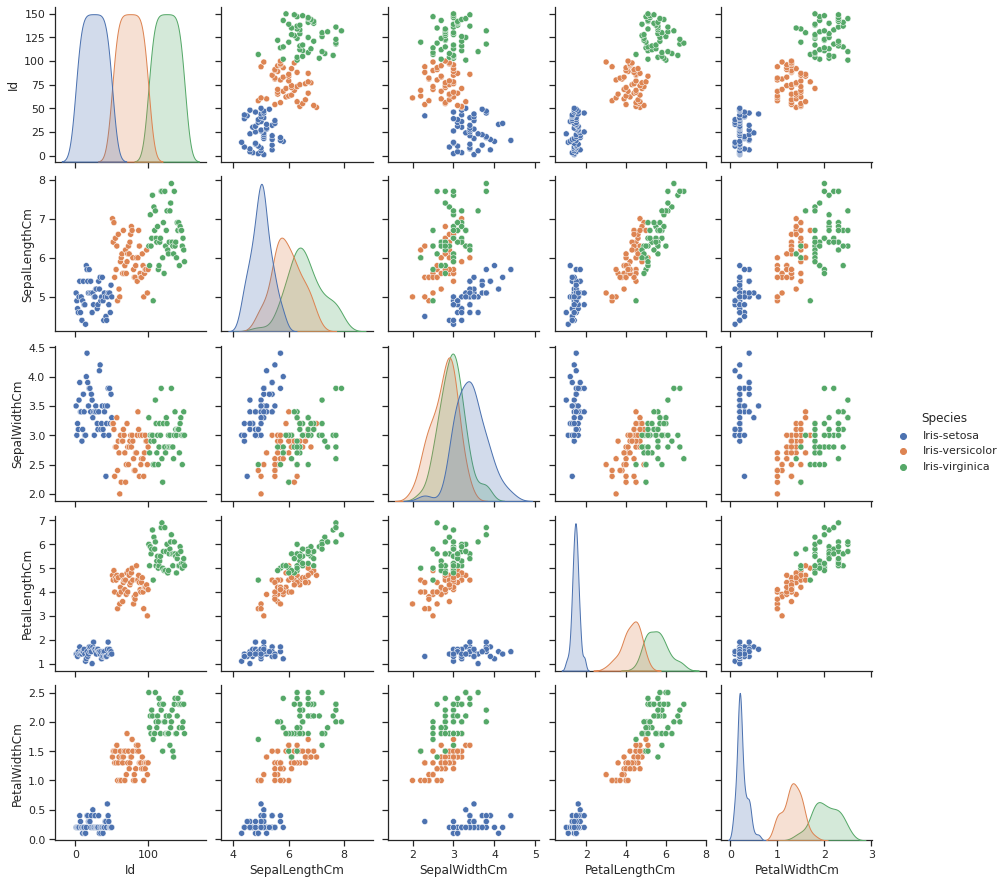

In [35]:
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(df1, hue="Species")
plt.show()

In [36]:
db.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [37]:
#combine columns
only_features=['SepalWidthCm','PetalLengthCm','PetalWidthCm']
assembler = VectorAssembler(inputCols=only_features, outputCol='features')
feat_df = assembler.transform(dataset).select('features')
feat_df.show(6)

+-------------+
|     features|
+-------------+
|[3.5,1.4,0.2]|
|[3.0,1.4,0.2]|
|[3.2,1.3,0.2]|
|[3.1,1.5,0.2]|
|[3.6,1.4,0.2]|
|[3.9,1.7,0.4]|
+-------------+
only showing top 6 rows



In [38]:
#standardize dataset

scaler = StandardScaler(
    inputCol = 'features',
    outputCol = 'scaledfeatures',
    withMean = True,
    withStd = True).fit(feat_df)

    #when we transform the dtaframe the old features will remain
df_scaled = scaler.transform(feat_df)
df_scaled.show(6)

+-------------+--------------------+
|     features|      scaledfeatures|
+-------------+--------------------+
|[3.5,1.4,0.2]|[1.02861128089723...|
|[3.0,1.4,0.2]|[-0.1245403793014...|
|[3.2,1.3,0.2]|[0.33672028477802...|
|[3.1,1.5,0.2]|[0.10608995273828...|
|[3.6,1.4,0.2]|[1.25924161293697...|
|[3.9,1.7,0.4]|[1.95113260905619...|
+-------------+--------------------+
only showing top 6 rows



In [39]:
#Linear Regression
output = assembler.transform(dataset)
#input vs output
finalized_data = output.select('features','SepalLengthCm')
finalized_data.show()

+-------------+-------------+
|     features|SepalLengthCm|
+-------------+-------------+
|[3.5,1.4,0.2]|          5.1|
|[3.0,1.4,0.2]|          4.9|
|[3.2,1.3,0.2]|          4.7|
|[3.1,1.5,0.2]|          4.6|
|[3.6,1.4,0.2]|          5.0|
|[3.9,1.7,0.4]|          5.4|
|[3.4,1.4,0.3]|          4.6|
|[3.4,1.5,0.2]|          5.0|
|[2.9,1.4,0.2]|          4.4|
|[3.1,1.5,0.1]|          4.9|
|[3.7,1.5,0.2]|          5.4|
|[3.4,1.6,0.2]|          4.8|
|[3.0,1.4,0.1]|          4.8|
|[3.0,1.1,0.1]|          4.3|
|[4.0,1.2,0.2]|          5.8|
|[4.4,1.5,0.4]|          5.7|
|[3.9,1.3,0.4]|          5.4|
|[3.5,1.4,0.3]|          5.1|
|[3.8,1.7,0.3]|          5.7|
|[3.8,1.5,0.3]|          5.1|
+-------------+-------------+
only showing top 20 rows



In [40]:
#split train & test data
train_data,test_data = finalized_data.randomSplit([0.8,0.2])

In [41]:
#train model
regressor = LinearRegression(featuresCol='features', labelCol='SepalLengthCm')
#learn to fit the model from train set
regressor = regressor.fit(train_data)

In [42]:
#model coefficient
coeff = regressor.coefficients
#x & Yintercept
intr = regressor.intercept
print("The coefficient of the model is : %a" %coeff)
print("The intercept of the model is : %f" %intr)

The coefficient of the model is : DenseVector([0.6546, 0.6259, -0.3535])
The intercept of the model is : 1.918225


In [43]:
#Evaluate model for test dataset
pred = regressor.evaluate(test_data)
pred
#predict the model
pred.predictions.show()

+-------------+-------------+------------------+
|     features|SepalLengthCm|        prediction|
+-------------+-------------+------------------+
|[2.5,3.9,1.1]|          5.6|5.6070284342606245|
|[2.5,5.0,2.0]|          5.7| 5.977372263786108|
|[2.6,4.0,1.2]|          5.8| 5.699732730550343|
|[2.8,4.0,1.3]|          6.1| 5.795309860292246|
|[2.8,5.1,2.4]|          5.8|6.0949512806286155|
|[2.8,5.6,2.1]|          6.4| 6.513961562992508|
|[2.8,6.7,2.0]|          7.7| 7.237817438463555|
|[2.9,4.6,1.3]|          6.6| 6.236322029756742|
|[2.9,6.3,1.8]|          7.3| 7.123618679956719|
|[3.0,1.4,0.3]|          4.8| 4.652375563957108|
|[3.0,4.5,1.5]|          5.6| 6.168492454019814|
|[3.0,5.8,1.6]|          7.2|6.9468285877338385|
|[3.0,5.9,2.1]|          7.1| 6.832663898477101|
|[3.1,1.5,0.1]|          4.9| 4.851133474030495|
|[3.2,4.7,1.4]|          7.0|  6.45995466038292|
|[3.2,4.8,1.8]|          5.9| 6.381141175720739|
|[3.2,5.7,2.3]|          6.9| 6.767707156192358|
|[3.2,5.9,2.3]|     

In [44]:
#calculate model statistics

from pyspark.ml.evaluation import RegressionEvaluator
eval = RegressionEvaluator(labelCol="SepalLengthCm", predictionCol='prediction', metricName='rmse')

#root mean square error
rmse = eval.evaluate(pred.predictions)
print("rmse: %.3f" % rmse)

#mean square error
mse = eval.evaluate(pred.predictions,{eval.metricName: "mse"})
print("MSE: %.3f" % mse)

#mean absolute error
mae = eval.evaluate(pred.predictions,{eval.metricName: "mae"})
print("MAE: %.3f" % mae)

#r2 - coefficient
r2 = eval.evaluate(pred.predictions,{eval.metricName: "r2"})
print("r2: %.3f" % r2)
     

rmse: 0.309
MSE: 0.095
MAE: 0.257
r2: 0.885
